# **O problema que queremos resolver é**:

 Dado o desempenho de um aluno (nota final e número de faltas), como podemos prever se ele vai ser aprovado ou reprovado?
 Isso tem aplicações em sistemas de recomendação educacional e alertas para recuperação preventiva.

**Importação de bibliotecas e carregamento dos dados**

Nesta etapa, são importadas as bibliotecas necessárias para análise de dados, visualização gráfica, construção e avaliação de modelos de árvore de decisão. Em seguida, os dados são carregados de uma planilha online para serem utilizados no processo de análise e modelagem.









In [ ]:
#importando as bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#carregando os dados
sheet_url = "https://docs.google.com/spreadsheets/d/1Qqn6Eo8CxwW-tuJ-kKy7vYakurMY6ZRhrfBMrjKxpWA/export?format=csv"
dados = pd.read_csv(sheet_url)
print(dados.head(10))



   nota  faltas  passou
0   7.3       2       1
1   5.5       2       1
2   1.1       8       0
3   4.0       9       0
4   6.0       7       0
5   4.9       7       0
6   6.0       1       1
7   5.2       4       0
8   2.1       3       0
9   8.0       2       1


**Análise estatística descritiva**

Aqui é realizada uma análise estatística descritiva dos dados, exibindo informações como média, desvio padrão, valores mínimos, máximos e quartis. Isso ajuda a entender o comportamento e a distribuição dos dados antes da modelagem.

In [ ]:
# Estatística descritiva
print("Resumo estatístico:")
print(dados.describe().round(2))

Resumo estatístico:
         nota  faltas  passou
count  120.00  120.00   120.0
mean     5.72    4.42     0.5
std      2.01    3.27     0.5
min      0.00    0.00     0.0
25%      4.00    2.00     0.0
50%      6.00    4.00     0.5
75%      7.22    7.00     1.0
max      9.40   16.00     1.0


**Visualização da distribuição das notas**

Esta etapa apresenta um histograma com a distribuição das notas dos alunos, permitindo visualizar a frequência de cada faixa de nota e identificar padrões, como concentração de valores ou possíveis assimetrias.

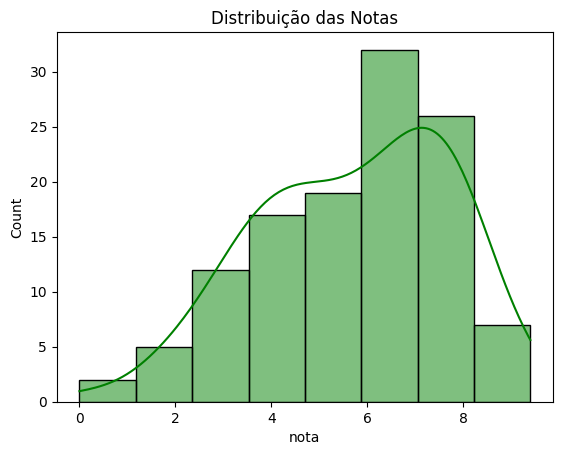

In [ ]:
# Visualização dos dados
sns.histplot(dados['nota'], kde=True, color='green')
plt.title("Distribuição das Notas")
plt.show()

**Análise das faltas em relação ao resultado**

O boxplot permite visualizar a distribuição do número de faltas em relação ao resultado dos alunos (aprovados ou reprovados). Isso ajuda a identificar como as faltas influenciam na aprovação e possíveis outliers no conjunto de dados.









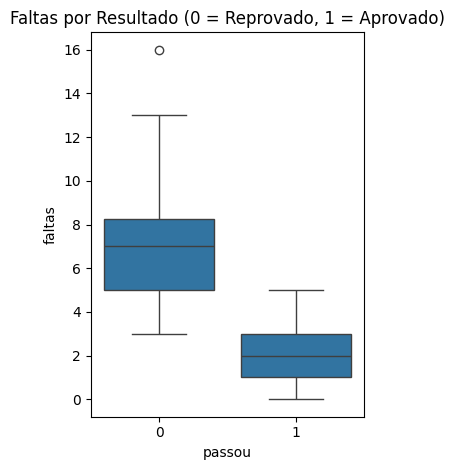

In [ ]:
# Boxplot de faltas por aprovação
plt.subplot(1, 2, 2)
sns.boxplot(x='passou', y='faltas', data=dados)
plt.title("Faltas por Resultado (0 = Reprovado, 1 = Aprovado)")
plt.tight_layout()
plt.show()

**Definição das variáveis de entrada e saída**

Nesta etapa, são definidos os dados de entrada (nota e faltas) que serão utilizados para treinar o modelo, e os dados de saída (passou), que representam o resultado que se deseja prever.

In [ ]:
x = dados[['nota' , 'faltas', ]] #dados de entrada

y = dados['passou'] #dados de saída

**Divisão dos dados em treino e teste**

Os dados são divididos em conjuntos de treinamento e teste, sendo 70% para treinar o modelo e 30% para avaliá-lo. A divisão é estratificada para manter a proporção das classes de aprovação em ambos os conjuntos.

In [ ]:
x_treino, x_teste , y_treino, y_teste = train_test_split(x, y, test_size =0.3, random_state=42, stratify=y)

**Criação e treinamento do modelo de árvore de decisão**

Um modelo de árvore de decisão é configurado com profundidade limitada para evitar sobreajuste e treinado com os dados de treinamento para aprender a relação entre as variáveis de entrada e o resultado esperado.









In [ ]:
modelo = DecisionTreeClassifier( max_depth=3) # Limita a profundidade da árvore
modelo.fit(x_treino, y_treino) #ensina o modelo a entender os dados do treino

DecisionTreeClassifier(max_depth=3)

**Realização das previsões com o modelo treinado**

O modelo treinado é utilizado para prever os resultados no conjunto de dados de teste, avaliando sua capacidade de generalização para novos dados.









In [ ]:
previsoes = modelo.predict(x_teste) #agora sim usa para adivinhar com o que foi aprendido

**Avaliação do desempenho do modelo**

Nesta etapa, são calculadas métricas de avaliação, como a acurácia, matriz de confusão e relatório de classificação, para medir a precisão do modelo e analisar seu desempenho na previsão dos resultados.

In [ ]:
acuracia = accuracy_score(y_teste, previsoes)
print(f"\n✅ Acurácia: {acuracia * 100:.2f}%")
print("\n📉 Matriz de Confusão:")
print(confusion_matrix(y_teste, previsoes))
print("\n📋 Relatório de Classificação:")
print(classification_report(y_teste, previsoes, target_names=["Reprovado", "Aprovado"]))


✅ Acurácia: 97.22%

📉 Matriz de Confusão:
[[18  0]
 [ 1 17]]

📋 Relatório de Classificação:
              precision    recall  f1-score   support

   Reprovado       0.95      1.00      0.97        18
    Aprovado       1.00      0.94      0.97        18

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



**Visualização da árvore de decisão**

Esta etapa gera um gráfico da árvore de decisão treinada, mostrando as regras de decisão, divisões das variáveis e os resultados finais, facilitando a interpretação do modelo.

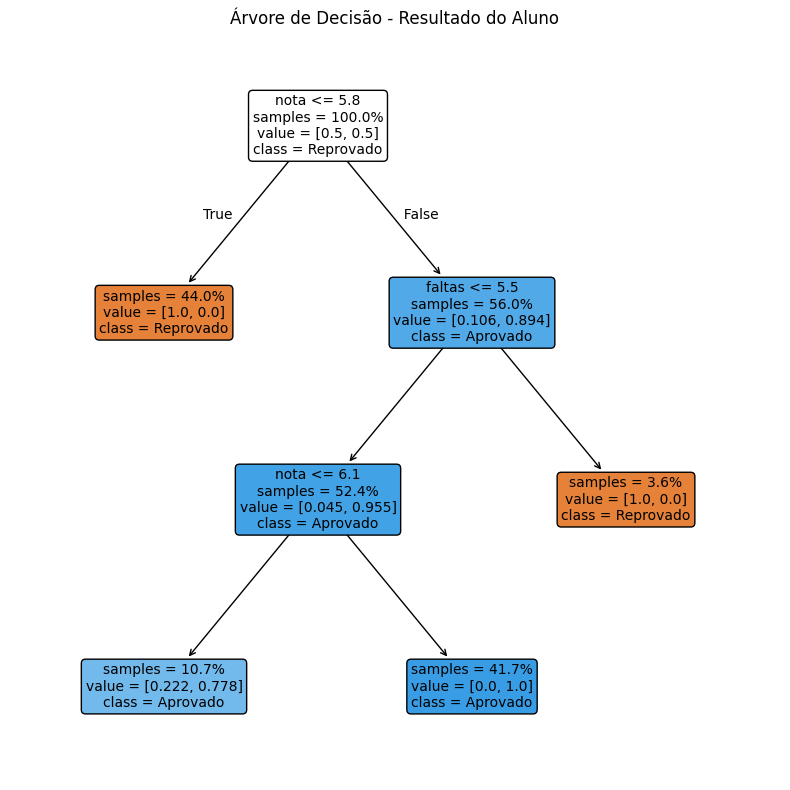

In [ ]:
# 🌲 Visualizando a árvore
plt.figure(figsize=(8, 8))
plot_tree(
    modelo,
    feature_names=x.columns,
    class_names=["Reprovado", "Aprovado"],
    filled=True,
    rounded=True,
    proportion=True,
    impurity=False,
    fontsize=10
)
plt.title("Árvore de Decisão - Resultado do Aluno")
plt.tight_layout()
plt.show()

**Função personalizada para previsão com análise estatística**

Essa função recebe uma nota e número de faltas de um aluno, compara esses valores com as estatísticas da turma (média e desvio padrão) e utiliza o modelo treinado para prever se o aluno será aprovado ou não, oferecendo uma análise interpretativa junto com a previsão.

In [ ]:
# 🤖 Função de previsão com estatística aplicada ao dado novo
def prever_aprovacao(nota, faltas):
    media_nota = dados['nota'].mean()
    media_faltas = dados['faltas'].mean()
    desvio_faltas = dados['faltas'].std()

    print("\n📌 Análise Estatística do Aluno:")
    print(f"- Nota informada: {nota} | Média da turma: {media_nota:.2f}")
    print(f"- Faltas informadas: {faltas} | Média: {media_faltas:.2f} | Desvio padrão: {desvio_faltas:.2f}")

    if nota > media_nota:
        print("✅ Nota acima da média.")
    elif nota < media_nota:
        print("⚠️ Nota abaixo da média.")
    else:
        print("🟡 Nota na média.")

    if faltas > media_faltas + desvio_faltas:
        print("❌ Faltas muito acima do esperado!")
    elif faltas < media_faltas - desvio_faltas:
        print("✅ Faltas bem abaixo da média.")
    else:
        print("🟡 Faltas dentro do padrão.")

    entrada = [[nota, faltas]]
    resultado = modelo.predict(entrada)
    return "🔮 Resultado da árvore: ✅ Aprovado" if resultado[0] == 1 else "🔮 Resultado da árvore: ❌ Reprovado"


**Testes da função de previsão com novos dados**

Nesta etapa, a função de previsão é testada com diferentes combinações de nota e faltas para verificar os resultados e a análise estatística gerada para cada caso.

In [ ]:
#teste com os novos dados
print(prever_aprovacao(8.3, 5))
print(prever_aprovacao(10, 6))
print(prever_aprovacao(9, 5))


📌 Análise Estatística do Aluno:
- Nota informada: 8.3 | Média da turma: 5.72
- Faltas informadas: 5 | Média: 4.42 | Desvio padrão: 3.27
✅ Nota acima da média.
🟡 Faltas dentro do padrão.
🔮 Resultado da árvore: ✅ Aprovado

📌 Análise Estatística do Aluno:
- Nota informada: 10 | Média da turma: 5.72
- Faltas informadas: 6 | Média: 4.42 | Desvio padrão: 3.27
✅ Nota acima da média.
🟡 Faltas dentro do padrão.
🔮 Resultado da árvore: ❌ Reprovado

📌 Análise Estatística do Aluno:
- Nota informada: 9 | Média da turma: 5.72
- Faltas informadas: 5 | Média: 4.42 | Desvio padrão: 3.27
✅ Nota acima da média.
🟡 Faltas dentro do padrão.
🔮 Resultado da árvore: ✅ Aprovado


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
